### **Desafío guiado - Clasificación desde la econometría**

### **`Descripción`**

En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:

- `sbp`: Presión Sanguínea Sistólica.
- `tobacco`: Promedio tabaco consumido por día.
- `ldl`: Lipoproteína de baja densidad.
- `adiposity`: Adiposidad.
- `famhist`: Antecedentes familiares de enfermedades cardiácas. (Binaria)
- `types`: Personalidad tipo A
- `obesity`: Obesidad.
- `alcohol`: Consumo actual de alcohol.
- `age`: edad.
- `chd`: Enfermedad coronaria. (dummy). **Vector objetivo**.

### **`Desafío 1: Preparar el ambiente de trabajo`**

- Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
- Importe el archivo `southafricanheart.csv` que se encuentra dentro del material de apoyo.

In [10]:
# Utiliza esta celda para importar los módulos solicitados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# evitar warnings y deprecaciones 
import warnings 
warnings.filterwarnings(action="ignore")

from calidad_datos import calidad_datos
#from graficos import cross_plot

plt.style.use('seaborn') # gráficos estilo seaborn 
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos 
plt.rcParams["figure.dpi"] = 70 # resolución gráficos

In [5]:
df = pd.read_csv("southafricanheart.csv", index_col=0)

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


- Realice una descripción del set importado mostrando la lista con los nombres de variables importadas

In [6]:
# Utiliza esta celda para mostrar los nombres de las columnas del dataframe

df.columns.to_list()

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'chd']

- Muestre un análisis descriptivo mediante .describe()

In [11]:
# Utiliza esta celda para aplicar describe()
#Es para variables continuas, no considerar el chd

df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.33,20.50,101.00,124.00,134.00,148.00,218.00
tobacco,462.0,3.64,4.59,0.00,0.05,2.00,5.50,31.20
ldl,462.0,4.74,2.07,0.98,3.28,4.34,5.79,15.33
adiposity,462.0,25.41,7.78,6.74,19.77,26.12,31.23,42.49
typea,462.0,53.10,9.82,13.00,47.00,53.00,60.00,78.00
obesity,462.0,26.04,4.21,14.70,22.98,25.80,28.50,46.58
alcohol,462.0,17.04,24.48,0.00,0.51,7.51,23.89,147.19
age,462.0,42.82,14.61,15.00,31.00,45.00,55.00,64.00
chd,462.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [8]:
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

**Comentarios de las variables continuas**
Sus magnitudes son variadas. 
Se aprecia que no existen valores nulos.
Chd no se debe considerar como variable continua, ya que corresponde anuesto vector objetico que es categórico. 

- Muestre distribución de categorías para las variables `famhist` y `chd`.

In [12]:
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [13]:
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

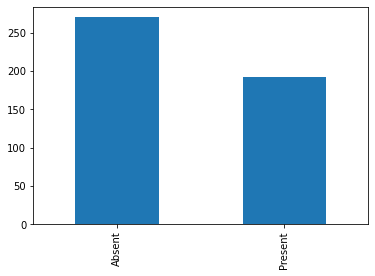

In [4]:
# Utiliza esta celda para mostrar las frecuencias de famhist con un gráfico de barras

df["famhist"].value_counts().plot(kind="bar");

<AxesSubplot:xlabel='famhist', ylabel='count'>

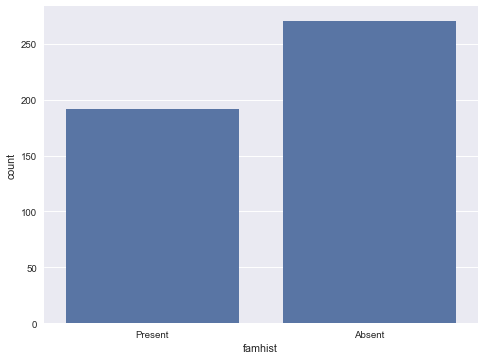

In [18]:
sns.countplot(x=df['famhist'])

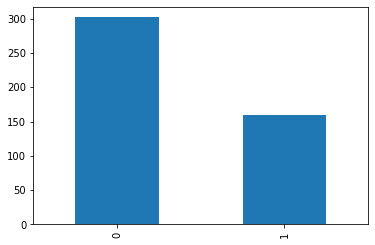

In [5]:
# Utiliza esta celda para mostrar las frecuencias de chd con un gráfico de barras

df["chd"].value_counts().plot(kind="bar");

<AxesSubplot:xlabel='count', ylabel='chd'>

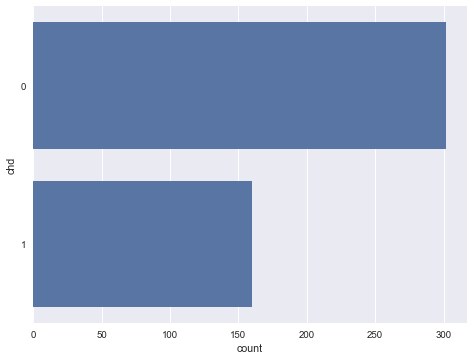

In [17]:
sns.countplot(y=df['chd'])

**Comentarios de las variables categóricas**

Una mayor cantidad de personas no tiene antecendentes familiares ni presenta enfermedad coronaria. Esto se aprecia en los gráficos de barra.

### **`Desafío 2`**

A continuación se presenta el siguiente modelo a estimar:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \beta_{famhist} \cdot \text{famhist}_i
$$

Para ello ejecute los siguientes pasos:
1. Recodifique `famhist` a dummy, asignando 1 a la categoría minoritaria.

In [21]:
# Utiliza esta celda para realizar la codificación solicitada
#Se coloca 1 a al categoria minoritaria

df["famhist"] = df["famhist"].replace(["Absent", "Present"], [0, 1])

df["famhist"].value_counts()

0    270
1    192
Name: famhist, dtype: int64

Otras formas que podemos utilizar para crear una nueva columna binaria:

In [ ]:
df['famhist'] = pd.get_dummies(df, columns=['famhist'], drop_first=True)

In [ ]:
df['famhist'] = np.where(df['famhist'] == 'Present', 1, 0)

In [ ]:
df.loc[df.famhist == 'Absent', 'famhist'] == 0
df.loc[df.famhist == 'Present', 'famhist'] == 1

2. Utilice `smf.logit` para estimar el modelo.

In [22]:
# Utiliza esta celda para instanciar y entrenar el modelo solicitado
#vd ~ vi , df

modelo_1 = smf.logit("chd ~ famhist", df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


In [23]:
modelo_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: chd              Pseudo R-squared: 0.057     
Date:               2024-01-05 10:59 AIC:              565.8944  
No. Observations:   462              BIC:              574.1655  
Df Model:           1                Log-Likelihood:   -280.95   
Df Residuals:       460              LL-Null:          -298.05   
Converged:          1.0000           LLR p-value:      4.9371e-09
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.1690    0.1431  -8.1687  0.0000  -1.4495  -0.8885
famhist        1.1690    0.2033   5.7514  0.0000   0.7706   1.5674
=================================================================

"""

3. Implemente una función `inverse_logit` que realice el mapeo de log-odds a probabilidad.

In [24]:
# Utiliza esta celda para implementar la función solicitada

#en el x van los logaritmos de chance de ocurrencia

def inverse_logit(x):
    #Retorna una probabilidad
    return 1 / (1 + np. exp(-x))

4.  Con el modelo estimado, responda lo siguiente:
- ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [25]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=1.
#En los params estan los coeficientes

log_odds_estimados = modelo_1.params["Intercept"] +  modelo_1.params["famhist"] * 1

# Obtener además la probabilidad utilizando inverse_logit

probabilidad_con_antecedentes = inverse_logit(log_odds_estimados)

print(f"La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de {probabilidad_con_antecedentes}")

La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de 0.5


¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener
una enfermedad coronaria?

In [27]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=0.

log_odds_estimados_sin = modelo_1.params["Intercept"] +  modelo_1.params["famhist"] * 0

# Obtener además la probabilidad utilizando inverse_logit

probabilidad_sin_antecedentes = inverse_logit(log_odds_estimados_sin)

print(f"La prob de tener una enfermedad coronaria cuando no se tiene antecedentes familiares es de {round(probabilidad_sin_antecedentes, 2)}")

La prob de tener una enfermedad coronaria cuando no se tiene antecedentes familiares es de 0.24


- ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [28]:
# Utiliza esta celda para mostrar las diferencias de ambas probabilidades

print(f"Un individuo con antecendentes familiares tiene {round(probabilidad_con_antecedentes-probabilidad_sin_antecedentes, 2)}"
      f" más de probabilidades tener una enfermedad coronaria")

Un individuo con antecendentes familiares tiene 0.26 más de probabilidades tener una enfermedad coronaria


- Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. _Tip: Utilice $\beta$/4_

In [12]:
# Utiliza esta celda para entrenar el modelo ols y mostrar los coeficientes

modelo_2 =smf.ols("chd ~ famhist", df).fit()
modelo_2.params

Intercept    0.237037
famhist      0.262963
dtype: float64

In [13]:
modelo_1.params

Intercept   -1.168993
famhist      1.168993
dtype: float64

In [14]:
modelo_1.params["famhist"] / 4

0.29224827135747744

**Respuesta**
El valor obtenido al dividir el coeficiente estimado con logit por 4 es similar al valor del coeficiente obtenido con Min Cuad

### **`Desafío 3: Estimación completa`**

Implemente un modelo con la siguiente forma:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \sum_{j=1}^{n}\beta_j \cdot X_{ji}
$$

In [29]:
# Utiliza esta celda para entrenar el modelo solicitado

model_3 = smf.logit("chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age", df).fit()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


In [34]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.2080
Time:                        11:20:20   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
typea          0.0396      0.012      3.214      0.001       0.015       0.064
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

In [33]:
model_3.summary().tables[0]

Dep. Variable:,chd,No. Observations:,462
Model:,Logit,Df Residuals:,452
Method:,MLE,Df Model:,9
Date:,"Fri, 05 Jan 2024",Pseudo R-squ.:,0.2080
Time:,11:20:02,Log-Likelihood:,-236.07
converged:,True,LL-Null:,-298.05
Covariance Type:,nonrobust,LLR p-value:,2.055e-22


In [35]:
model_3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.1507,1.308,-4.701,0.000,-8.715,-3.587
sbp,0.0065,0.006,1.135,0.256,-0.005,0.018
tobacco,0.0794,0.027,2.984,0.003,0.027,0.132
ldl,0.1739,0.060,2.915,0.004,0.057,0.291
adiposity,0.0186,0.029,0.635,0.526,-0.039,0.076
famhist,0.9254,0.228,4.061,0.000,0.479,1.372
typea,0.0396,0.012,3.214,0.001,0.015,0.064
obesity,-0.0629,0.044,-1.422,0.155,-0.150,0.024
alcohol,0.0001,0.004,0.027,0.978,-0.009,0.009
age,0.0452,0.012,3.728,0.000,0.021,0.069


- Depure el modelo manteniendo las variables con significancia estadística al 5%.

In [32]:
# Utiliza esta celda para mostrar los coeficientes con significancia estadística al 5%

coefs = model_3.summary2().tables[1]

coefs[coefs["P>|z|"] < 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150721,1.308260,-4.701451,0.000003,-8.714863,-3.586578
tobacco,0.079376,0.026603,2.983758,0.002847,0.027236,0.131517
ldl,0.173924,0.059662,2.915166,0.003555,0.056989,0.290859
famhist,0.925370,0.227894,4.060530,0.000049,0.478706,1.372034
typea,0.039595,0.012320,3.213823,0.001310,0.015448,0.063742
age,0.045225,0.012130,3.728464,0.000193,0.021451,0.068999


In [36]:
# Utiliza esta celda para entrenar el modelo depurado
# Dejamos solo las variables que son significativas

model_4 = smf.logit("chd ~ tobacco + ldl + famhist + typea + age", df).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


In [38]:
model_4.summary().tables[0]

Dep. Variable:,chd,No. Observations:,462
Model:,Logit,Df Residuals:,456
Method:,MLE,Df Model:,5
Date:,"Fri, 05 Jan 2024",Pseudo R-squ.:,0.2020
Time:,11:34:07,Log-Likelihood:,-237.84
converged:,True,LL-Null:,-298.05
Covariance Type:,nonrobust,LLR p-value:,2.554e-24


In [43]:
model_4.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.4464,0.921,-7.000,0.000,-8.251,-4.642
tobacco,0.0804,0.026,3.106,0.002,0.030,0.131
ldl,0.1620,0.055,2.947,0.003,0.054,0.270
famhist,0.9082,0.226,4.023,0.000,0.466,1.351
typea,0.0371,0.012,3.051,0.002,0.013,0.061
age,0.0505,0.010,4.944,0.000,0.030,0.070


- Compare los estadísticos de bondad de ajuste entre ambos.

In [39]:
# Comparamos el Pseudo R-squared
# Mientras más variables tenga MEJOR R-cuadrado vamos a tener
# El Pseudo R-Square es apenas un 0.5% mayor en el caso del primer modelo. (son bien bajos los 2)

model_3.prsquared-model_4.prsquared

0.005947820131952164

In [40]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del primer modelo

print(f"La Log verosimilitud del modelo saturado es de {round(model_3.llf, 2)}")

La Log verosimilitud del modelo saturado es de -236.07


In [41]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del segundo modelo

print(f"La Log verosimilitud del modelo depurado es de {round(model_4.llf, 2)}")

La Log verosimilitud del modelo depurado es de -237.84


**Respuesta**

La log verosimilitud es levemente (mayor) en el modelo saturado

- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria

In [42]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan positivamente
# Muestra las variables que inciden en tener una enfermedad coronaria

coefs_dep = model_4.summary2().tables[1]
coefs_dep[coefs_dep["Coef."] > 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
tobacco,0.080375,0.025880,3.105731,1.898095e-03,0.029652,0.131099
ldl,0.161992,0.054969,2.946967,3.209075e-03,0.054255,0.269729
famhist,0.908175,0.225758,4.022774,5.751661e-05,0.465697,1.350654
typea,0.037115,0.012167,3.050542,2.284291e-03,0.013269,0.060962
age,0.050460,0.010206,4.944159,7.647332e-07,0.030457,0.070464


In [46]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan negativamente

coefs_dep[coefs_dep["Coef."] < 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.446445,0.920872,-7.000372,2.552836e-12,-8.25132,-4.641569


**Respuesta**

- Los factores de riesgo de tener una enfermedad coronaria son el hecho de fumar, tener un valor de ldl alto, tener antecedentes familiares, tener personalidad tipo A y ser mayor de edad.

- Entre las variables explicativas del dataframe, no existe ninguna la cual tenga un efecto negativo (significativo) en la prediccion de nuestro target, solo el intercepto es negativo pero este no pertenece o no tiene asociada ninguna variable.

### **`Desafío 4: Estimación de perfiles`**

A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con `inverse_logit`. Los perfiles a estimar son los siguientes:

- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra (se refiere a una persona promedio).

Primera forma

In [66]:
def predict_proba(model=model_4, **values):
    values = pd.Series(values)
    log_odds = sum(model.params * values)
    prob = inverse_logit(log_odds)
    return prob

In [67]:
prob_profile_mean = predict_proba(Intercept=1,
                                  tobacco=df.tobacco.mean(),
                                  ldl=df.ldl.mean(),
                                  famhist=df.famhist.mean(),
                                  typea=df.typea.mean(),
                                  age=df.age.mean())

prob_profile_mean

0.29370927481586945

Desglose (explicación) de la función:

In [62]:
values = pd.Series(dict(Intercept=1,tobacco=df.tobacco.mean(),ldl=df.ldl.mean(),famhist=df.famhist.mean(),typea=df.typea.mean(),age=df.age.mean()))
values

Intercept     1.000000
tobacco       3.635649
ldl           4.740325
famhist       0.415584
typea        53.103896
age          42.816017
dtype: float64

In [65]:
model_4.params

Intercept   -6.446445
tobacco      0.080375
ldl          0.161992
famhist      0.908175
typea        0.037115
age          0.050460
dtype: float64

In [63]:
log_odds = sum(model_4.params * pd.Series(values))
log_odds

-0.8774365278532725

In [64]:
prob = inverse_logit(log_odds)
prob

0.29370927481586945

Segunda forma

In [47]:
coefs_dep.index

Index(['Intercept', 'tobacco', 'ldl', 'famhist', 'typea', 'age'], dtype='object')

In [54]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares

log_odds_promedio = model_4.params["Intercept"] + model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].mean() + model_4.params["famhist"] * df['famhist'].mean() + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_promedio = inverse_logit(log_odds_promedio)

prob_promedio


0.29370927481586945

- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

Primera forma

In [69]:
# Se decidió utilizar los cuantiles como indicadores altos y bajos, pero estos pueden ser indicados por el area de negocios o nosotros decidir un valor X
high = 0.8
low = 0.2

prob_profile_ldl_high = predict_proba(Intercept=1,
                                  tobacco=df.tobacco.mean(),
                                  ldl=df.ldl.quantile(high),
                                  famhist=df.famhist.mean(),
                                  typea=df.typea.mean(),
                                  age=df.age.mean())

prob_profile_ldl_low = predict_proba(Intercept=1,
                                  tobacco=df.tobacco.mean(),
                                  ldl=df.ldl.quantile(low),
                                  famhist=df.famhist.mean(),
                                  typea=df.typea.mean(),
                                  age=df.age.mean())

prob_profile_ldl_high, prob_profile_ldl_low

(0.34275863459388883, 0.2418602897627156)

Segunda forma:

In [70]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio  y un alto nivel de lopoproteína de baja densidad

log_odds_alto_ldl = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].quantile(high) + model_4.params["famhist"] * df['famhist'].mean() + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_alto_ldl = inverse_logit(log_odds_alto_ldl)
 
prob_alto_ldl

0.34275863459388883

- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [71]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio  y un bajo nivel de lopoproteína de baja densidad

log_odds_alto_ldl = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].quantile(low) + model_4.params["famhist"] * df['famhist'].mean() + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_alto_ldl = inverse_logit(log_odds_alto_ldl)
 
prob_alto_ldl

0.2418602897627156